# How to Make a Text Classifier: Fake News Edition
<br><br>

<b>Agenda:</b>

We are going to build a naive bayes classifier for the purpose of classifying news as "FAKE" or "REAL"

- Prepare the corpus (documents) for modeling using count and tfidf vectorizers
- Train a naive bayes model on the vectorized documents
- Use grid search to optimize our model.

[Article about this project](https://opendatascience.com/blog/how-to-build-a-fake-news-classification-model/)

## “A lie gets halfway around the world before the truth has a chance to get its pants on.” – Winston Churchill


<b>“What is fake news?”</b>
<br><br>
<b>Can you build a model that can differentiate between “Real” news vs “Fake” news.</b>

Requirements: pandas, numpy, matplotlib, sklearn, nltk

This is in Python 3

In [116]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV
pd.set_option("max.columns", 100)

Load in the data set

In [5]:
df = pd.read_csv("fake_real_news.csv", usecols=["title","text", "label"])
#view data
df.head()

title  \
0  ‘A target on Roe v. Wade ’: Oklahoma bill maki...   
1  Study: women had to drive 4 times farther afte...   
2        Trump, Clinton clash in dueling DC speeches   
3  Grand jury in Texas indicts activists behind P...   
4  As Reproductive Rights Hang In The Balance, De...   

                                                text label  
0  UPDATE: Gov. Fallin vetoed the bill on Friday....  REAL  
1  Ever since Texas laws closed about half of the...  REAL  
2  Donald Trump and Hillary Clinton, now at the s...  REAL  
3  A Houston grand jury investigating criminal al...  REAL  
4  WASHINGTON -- Forty-three years after the Supr...  REAL

In [6]:
#View tail
df.head()

title  \
0  ‘A target on Roe v. Wade ’: Oklahoma bill maki...   
1  Study: women had to drive 4 times farther afte...   
2        Trump, Clinton clash in dueling DC speeches   
3  Grand jury in Texas indicts activists behind P...   
4  As Reproductive Rights Hang In The Balance, De...   

                                                text label  
0  UPDATE: Gov. Fallin vetoed the bill on Friday....  REAL  
1  Ever since Texas laws closed about half of the...  REAL  
2  Donald Trump and Hillary Clinton, now at the s...  REAL  
3  A Houston grand jury investigating criminal al...  REAL  
4  WASHINGTON -- Forty-three years after the Supr...  REAL

In [7]:
#Print 10 random titles

for i in df.title.sample(n= 10):
    print i, "\n"

Charting a course for charter schools 

After Election Day, Democrats, Republicans and the media have some serious soul-searching to do 

Child dressed as ghost accused of Islamification of Halloween 

Turkish Government Arrests Opposition Parliament Members in Further Descent Into Dictatorship 

Tom Hayden, Courageous Warrior for Peace 

Putin being FRAMED at UN for War Crimes in Syria Explained 

Inside the Invisible Government; War, Propaganda, Clinton & Trump 

Here's why I never warmed up to Bernie Sanders 

RELEASE: The Podesta Emails Part 20 

Wall Street And The Pentagon 



In [14]:
#Print article

print df.text[300][:1000]

Hillary Clinton, even if she can secure the Democratic nomination in the coming weeks, will have to do more than just make peace with Bernie Sanders’ supporters. She’ll need to persuade his true believers they share the same goals -- and to go out and vote for her.

Exit polls consistently show swaths of the Sanders base, at least right now, are uneasy about the idea of supporting Clinton in November.

Republican presidential front-runner Donald Trump, in an interview with Fox News’ “Hannity,” went so far Monday as to claim Sanders’ young supporters “are going to come over to my side because they want jobs.” Trump cited common ground with Sanders on trade.

Whether anti-Clinton supporters of the democratic socialist senator really would gravitate toward the billionaire businessman -- or simply stay home -- is an open question. But anticipating some bad blood, Clinton has taken the first steps toward reconciliation with Sanders supporters in recent weeks.

“Whether you


### The Articles

- 4594 articles published between October 2015 and December 2016.
- The "FAKE" articles came from this [Kaggle page.](https://www.kaggle.com/mrisdal/fake-news)
- The "REAL" articles came from www.allsides.com and are from publications like New York Times, WSJ, Bloomberg, NPR, and the Guardian.

### Tokenizing text with count and TFIDF Vectorizers

Before we can build a model, we have to turn words to numbers.

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [15]:
#Assign text to X variable and labels to y

X = df.text
y = df.label

In [18]:
#Intialize Count Vectorizer
count_vec = CountVectorizer()
#Fit Count Vectorizer
dtm_cv = count_vec.fit_transform(X)
#Convert it to a pandas data frame
df_cv = pd.DataFrame(dtm_cv.toarray(), columns=count_vec.get_feature_names())

In [19]:
#Look at df_cv
df_cv.head()

00  000  0000  000000031  0002  000billion  000ft  000lb  000s  000th ...  \
0   0    0     0          0     0           0      0      0     0      0 ...   
1   0    0     0          0     0           0      0      0     0      0 ...   
2   0    0     0          0     0           0      0      0     0      0 ...   
3   0    0     0          0     0           0      0      0     0      0 ...   
4   0    0     0          0     0           0      0      0     0      0 ...   

   إنفوجرافيك  السعودية  النيرب  عربي  ಠ_ಠ  ḥaram  不動心  初心  残心  無心  
0           0         0       0     0    0      0    0   0   0   0  
1           0         0       0     0    0      0    0   0   0   0  
2           0         0       0     0    0      0    0   0   0   0  
3           0         0       0     0    0      0    0   0   0   0  
4           0         0       0     0    0      0    0   0   0   0  

[5 rows x 57535 columns]

In [22]:
#How big is data
df_cv.shape

(4594, 57535)

In [21]:
#Print first 100 feature names
print(count_vec.get_feature_names()[:100])

[u'00', u'000', u'0000', u'000000031', u'0002', u'000billion', u'000ft', u'000lb', u'000s', u'000th', u'001', u'002', u'003', u'004', u'005', u'006', u'00684', u'006s', u'007', u'008s', u'009', u'00am', u'00p', u'00pm', u'01', u'010', u'011', u'013', u'014', u'018', u'01pm', u'02', u'020', u'022', u'023', u'0235', u'024', u'025', u'026', u'027', u'028', u'029', u'02welcome', u'03', u'0325', u'033', u'039', u'04', u'040', u'042', u'047', u'048', u'049', u'04am', u'05', u'050', u'0500', u'056', u'057', u'059', u'06', u'0600', u'063', u'066', u'068', u'069', u'06quito2150', u'06quito2991', u'07', u'070', u'071', u'075', u'076', u'077', u'08', u'080', u'0800', u'080225_michelle_obama', u'081', u'084', u'0843', u'085', u'087', u'088da582', u'089', u'0891', u'09', u'090', u'093', u'094', u'095', u'097', u'098', u'09am', u'09pm', u'0_13ddwv4e', u'0_qfc5sn0k', u'0aza8', u'0b6njlny5j', u'0eb2fe42e57d']


In [23]:
#Print random slice of feature names
print(count_vec.get_feature_names()[19000:19200])

[u'exude', u'exuded', u'exudes', u'exuding', u'exult', u'exurb', u'exurban', u'exurbs', u'exxon', u'exxonmobil', u'exxtraterrestrials', u'eye', u'eyeballs', u'eyebrow', u'eyebrows', u'eyed', u'eyeglasses', u'eyeing', u'eyelash', u'eyeless', u'eyelids', u'eyeopening', u'eyes', u'eyesight', u'eyewitness', u'eyewitnesses', u'eying', u'eyoel', u'eytan', u'ez', u'ez12', u'ezer', u'ezra', u'ezz7xqbj6e', u'ezzor', u'f1', u'f11', u'f16', u'f35', u'f4', u'f5', u'f86', u'f__king', u'faa', u'fab', u'fabian', u'fabienne', u'fabio', u'fable', u'fabled', u'fabric', u'fabricate', u'fabricated', u'fabricating', u'fabrication', u'fabrications', u'fabricator', u'fabrics', u'fabrikant', u'fabrizio', u'fabulist', u'fabulous', u'fabulously', u'facade', u'facades', u'face', u'facebook', u'facebooks', u'faced', u'faceless', u'faceoff', u'faceoffs', u'faces', u'facet', u'faceted', u'facetime', u'facetiming', u'facetious', u'facets', u'facial', u'facials', u'facie', u'facile', u'facilitate', u'facilitated', u'

Let's configure out count vectorizer

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

- <b>stop_words</b> : string {‘english’}, list, or None (default)
- If ‘english’, a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

Train a Count Vectorizer with lowercase words, includes words and two-word phrases, filters out stop words, and only uses words that show up at least 3 times.

In [24]:
#Intialize Count Vectorizer
count_vec = CountVectorizer(lowercase=True, stop_words="english", ngram_range=(1,2),
                           min_df = 3)
#Fit Count Vectorizer
dtm_cv = count_vec.fit_transform(X)
#Convert it to a pandas data frame
df_cv = pd.DataFrame(dtm_cv.toarray(), columns=count_vec.get_feature_names())

In [25]:
#Look at data
df_cv.head()

00  00 00  00 pm  000  000 000  000 100  000 15  000 20  000 2008  \
0   0      0      0    0        0        0       0       0         0   
1   0      0      0    0        0        0       0       0         0   
2   0      0      0    0        0        0       0       0         0   
3   0      0      0    0        0        0       0       0         0   
4   0      0      0    0        0        0       0       0         0   

   000 2010     ...      zuckerberg team  zucman  zuesse  zuesse eric  \
0         0     ...                    0       0       0            0   
1         0     ...                    0       0       0            0   
2         0     ...                    0       0       0            0   
3         0     ...                    0       0       0            0   
4         0     ...                    0       0       0            0   

   zuesse november  zwick  zwick romney  état  être  être stone  
0                0      0             0     0     0           0  
1                0      0             0     0     0           0  
2                0      0             0     0     0           0  
3                0      0             0     0     0           0  
4                0      0             0     0     0           0  

[5 rows x 117425 columns]

In [26]:
#Look at random slice of features
print(count_vec.get_feature_names()[80000:80100])

[u'promoting clinton', u'promoting false', u'promoting reveling', u'promoting violence', u'promotion', u'promotional', u'prompt', u'prompted', u'prompted boos', u'prompted fbi', u'prompting', u'prompting accusations', u'prompting clinton', u'prompting trump', u'promptly', u'prompts', u'prompts new', u'prone', u'prone violence', u'pronged', u'pronged attack', u'pronoun', u'pronounce', u'pronounced', u'pronounced scalia', u'pronouncement', u'pronouncements', u'pronouncing', u'pronunciation', u'proof', u'proof contrary', u'proof russian', u'proofs', u'prop', u'propaganda', u'propaganda arm', u'propaganda campaign', u'propaganda clinton', u'propaganda films', u'propaganda insinuate', u'propaganda intention', u'propaganda lies', u'propaganda machine', u'propaganda mainstream', u'propaganda media', u'propaganda ministry', u'propaganda nephew', u'propaganda network', u'propaganda subscribe', u'propaganda use', u'propaganda world', u'propagandist', u'propagandistic', u'propagandists', u'propag

Time for TFIDF Vectorizer

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [39]:
#Intialize TFIDF Vectorizer
tf_vec = TfidfVectorizer()
#Fit TFIDF Vectorizer
dtm_tf = tf_vec.fit_transform(X)
#Convert it to a pandas data frame
df_tf = pd.DataFrame(dtm_tf.toarray(), columns=tf_vec.get_feature_names())

In [45]:
#View data 
df_tf.head()

00  000  0000  000000031  0002  000billion  000ft  000lb  000s  000th  \
0  0.0  0.0   0.0        0.0   0.0         0.0    0.0    0.0   0.0    0.0   
1  0.0  0.0   0.0        0.0   0.0         0.0    0.0    0.0   0.0    0.0   
2  0.0  0.0   0.0        0.0   0.0         0.0    0.0    0.0   0.0    0.0   
3  0.0  0.0   0.0        0.0   0.0         0.0    0.0    0.0   0.0    0.0   
4  0.0  0.0   0.0        0.0   0.0         0.0    0.0    0.0   0.0    0.0   

   001  002  003  004  005  006  00684  006s  007  008s  009  00am  00p  00pm  \
0  0.0  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0   

    01  010  011  013  014  018  01pm   02  020  022  023  0235  024  025  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   

   026  027  028  029  02welcome   03  0325  033  039   04  040  042 ...   \
0  0.0  0.0  0.0  0.0        0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0 ...    
1  0.0  0.0  0.0  0.0        0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0 ...    
2  0.0  0.0  0.0  0.0        0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0 ...    
3  0.0  0.0  0.0  0.0        0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0 ...    
4  0.0  0.0  0.0  0.0        0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0 ...    

   œif  œiâ  œlord  œmafia  œmaster  œmid  œmysterious  œnew  œno  œpuppet  \
0  0.0  0.0    0.0     0.0      0.0   0.0          0.0   0.0  0.0      0.0   
1  0.0  0.0    0.0     0.0      0.0   0.0          0.0   0.0  0.0      0.0   
2  0.0  0.0    0.0     0.0      0.0   0.0          0.0   0.0  0.0      0.0   
3  0.0  0.0    0.0     0.0      0.0   0.0          0.0   0.0  0.0      0.0   
4  0.0  0.0    0.0     0.0      0.0   0.0          0.0   0.0  0.0      0.0   

   œreceiving  œshadow  œsuddenly  œterror  œtheyâ  œurgent  œwe  œwhoa  \
0         0.0      0.0        0.0      0.0     0.0      0.0  0.0    0.0   
1         0.0      0.0        0.0      0.0     0.0      0.0  0.0    0.0   
2         0.0      0.0        0.0      0.0     0.0      0.0  0.0    0.0   
3         0.0      0.0        0.0      0.0     0.0      0.0  0.0    0.0   
4         0.0      0.0        0.0      0.0     0.0      0.0  0.0    0.0   

   œworry  œwow  œyou   œâ   śâ   şđ  šćepanović   ź4  ź50  željko  δ18o  \
0     0.0   0.0   0.0  0.0  0.0  0.0         0.0  0.0  0.0     0.0   0.0   
1     0.0   0.0   0.0  0.0  0.0  0.0         0.0  0.0  0.0     0.0   0.0   
2     0.0   0.0   0.0  0.0  0.0  0.0         0.0  0.0  0.0     0.0   0.0   
3     0.0   0.0   0.0  0.0  0.0  0.0         0.0  0.0  0.0     0.0   0.0   
4     0.0   0.0   0.0  0.0  0.0  0.0         0.0  0.0  0.0     0.0   0.0   

   грозный  минобороны  окт  опубликовано  россии  ужасный  фото   эa  эin  \
0      0.0         0.0  0.0           0.0     0.0      0.0   0.0  0.0  0.0   
1      0.0         0.0  0.0           0.0     0.0      0.0   0.0  0.0  0.0   
2      0.0         0.0  0.0           0.0     0.0      0.0   0.0  0.0  0.0   
3      0.0         0.0  0.0           0.0     0.0      0.0   0.0  0.0  0.0   
4      0.0         0.0  0.0           0.0     0.0      0.0   0.0  0.0  0.0   

   эthe  яркий  إنفوجرافيك  السعودية  النيرب  عربي  ಠ_ಠ  ḥaram  不動心   初心   残心  \
0   0.0    0.0         0.0       0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0   
1   0.0    0.0         0.0       0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0   
2   0.0    0.0         0.0       0.0   

Now that we have our two vectorized datasets. Let's get into the modeling.

### Naive Bayes

Bayes Theorem covers the probabilistic relationship between multiple variables, and specifically allows us to define one conditional in terms of the underlying probabilities and the inverse condition. Specifically, it can be defined as:

$$P(y|x) = P(y)P(x|y)/P(x)$$

This means the probability of y given x condition equals the probability of y times the probability of x given y condition divided by the probability of x.

This theorem can be extended to when x is a vector (containing the multiple x variables used as inputs for the model) to:

$$P(y|x_1,...,x_n) = P(y)P(x_1,...,x_n|y)/P(x_1,...,x_n)$$

Let's pretend we have an email with three words: "Send money now." We'll use Naive Bayes to classify it as **ham or spam.**

$$P(spam \ | \ \text{send money now}) = \frac {P(\text{send money now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

By assuming that the features (the words) are **conditionally independent**, we can simplify the likelihood function:

$$P(spam \ | \ \text{send money now}) \approx \frac {P(\text{send} \ | \ spam) \times P(\text{money} \ | \ spam) \times P(\text{now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

We can calculate all of the values in the numerator by examining a corpus of **spam email**:

$$P(spam \ | \ \text{send money now}) \approx \frac {0.2 \times 0.1 \times 0.1 \times 0.9} {P(\text{send money now})} = \frac {0.0018} {P(\text{send money now})}$$

We would repeat this process with a corpus of **ham email**:

$$P(ham \ | \ \text{send money now}) \approx \frac {0.05 \times 0.01 \times 0.1 \times 0.1} {P(\text{send money now})} = \frac {0.000005} {P(\text{send money now})}$$

All we care about is whether spam or ham has the **higher probability**, and so we predict that the email is **spam**.

#### Key takeaways

- The **"naive" assumption** of Naive Bayes (that the features are conditionally independent) is critical to making these calculations simple.
- The **normalization constant** (the denominator) can be ignored since it's the same for all classes.
- The **prior probability** is much less relevant once you have a lot of features.

### <b>Pros</b>: 
#### - Very fast. Adept at handling tens of thousands of features which is why it's used for text classification
#### - Works well with a small number of observations
#### - Isn't negatively affected by "noise"

### <b>Cons</b>:
#### - Useless for probabilities. Most of the time assigns probabilites that are close to zero or one
#### - It is literally "naive". Meaning it assumes features are independent.

Test NB model on the count vectorized data. Re-run the Count Vectorizer with stop_words = "english"

In [46]:
#Intialize Count Vectorizer
count_vec = CountVectorizer(stop_words="english")
#Fit Count Vectorizer
dtm_cv = count_vec.fit_transform(X)
#Convert it to a pandas data frame
df_cv = pd.DataFrame(dtm_cv.toarray(), columns=count_vec.get_feature_names())

Fit model

In [47]:
#Initialize model
model = MultinomialNB()
#Fit model with df_cv and y
model.fit(df_cv, y)
#score the model
model.score(df_cv, y)

0.9272964736612973

Re-run the TFIDF Vectorizer with stop_words = "english"

In [48]:
#Intialize TFIDF Vectorizer
tf_vec = TfidfVectorizer()
#Fit TFIDF Vectorizer
dtm_tf = tf_vec.fit_transform(X)
#Convert it to a pandas data frame
df_tf = pd.DataFrame(dtm_tf.toarray(), columns=tf_vec.get_feature_names())

In [49]:
#Initialize model
model = MultinomialNB()
#Fit model with df_tf and y
model.fit(df_tf, y)
#score the model
model.score(df_tf, y)

0.86482368306486723

Some good scores! Or are they?

Time for some cross validation.

In [52]:
#Call cross_val_score on the count vectorized dataset. Call .values on df_cv
cross_val_score(MultinomialNB(), df_cv.values, y, cv = 5, scoring="accuracy").mean()

0.87851046698872781

In [54]:
#Call cross_val_score on the tfidf vectorized dataset. Call .values on df_tf
cross_val_score(MultinomialNB(), df_tf.values, y, cv = 5, scoring="accuracy").mean()

0.78254759874964475

Which one wins? Count or TFIDF vectorizer?

Now we're going to optimize our model by testing out every possible configuration

### Grid Searching

https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

Create dictionaries for our "grids" aka every possible combination of configuration.

In [87]:
#Grid dictionary for count vectorized data
param_grid_cv = {}
param_grid_cv["countvectorizer__ngram_range"] = [(1,1), (1,2), (2,2)]
param_grid_cv["countvectorizer__max_features"] = [1000,5000, 10000]

In [77]:
#Grid dictionary for tfidf vectorized data
param_grid_tf = {}
param_grid_tf["tfidfvectorizer__ngram_range"] = [(1,1), (1,2), (2,2)]
param_grid_tf["tfidfvectorizer__max_features"] = [1000, 5000, 10000]

Make a pipeline

In [88]:
#Create pipeline for count vectorized data
pipe_cv = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB())

In [79]:
#Create pipeline for tfidf vectorized data
pipe_tf = make_pipeline(TfidfVectorizer(stop_words="english"), MultinomialNB())

Establish the grids

In [89]:
#Create grid for count vectorized data
grid_cv = GridSearchCV(pipe_cv, param_grid_cv, cv=3, scoring='accuracy')

In [90]:
#Create grid for tfidf vectorized data
grid_tf = GridSearchCV(pipe_tf, param_grid_tf, cv=3, scoring='accuracy')

This is gonna take a while so let's measure how long it takes

In [82]:
#Import time library
from time import time 

In [91]:
#Fit and time the grid_cv
t = time()
#Fit grid_cv on X and y
grid_cv.fit(X,y)
print(time()-t)

297.925406933


In [94]:
#Fit and time the grid_tf
t = time()
#Fit grid_cv on X and y
grid_tf.fit(X,y)
print(time()-t)

280.145465851


In [92]:
#Look at the best parameters and the best scores for count vectorized data
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'countvectorizer__ngram_range': (2, 2), 'countvectorizer__max_features': 10000}
0.884196778407


In [95]:
#Look at the best parameters and the best scores for tfidf vectorized data
print(grid_tf.best_params_)
print(grid_tf.best_score_)

{'tfidfvectorizer__ngram_range': (2, 2), 'tfidfvectorizer__max_features': 10000}
0.883108402264


## Bonus Section: How to find the "fakest" and "realest" words

In [97]:
#Fit count vectorizer and NB model

count_vec = CountVectorizer()
#Fit Count Vectorizer
dtm_cv = count_vec.fit_transform(X)

model = MultinomialNB()
model.fit(dtm_cv, y)
model.score(dtm_cv, y)

0.92707879843273833

In [98]:
#Assign feature list to tokens
tokens = count_vec.get_feature_names()

In [99]:
#Counts words in fake articles
fake_token_count = model.feature_count_[0,:]
fake_token_count

array([  43.,  960.,    1., ...,    1.,    1.,    1.])

In [100]:
#Counts words in real articles 
real_token_count = model.feature_count_[1,:]
real_token_count

array([  11.,  972.,    1., ...,    0.,    0.,    0.])

In [101]:
#Input tokens, fake_token_count, and real_token_count into a pandas data frame
tok_df = pd.DataFrame({"token":tokens, 
                       "fake":fake_token_count, 
                       "real":real_token_count}).set_index("token")

In [102]:
#Add 1 to fake and real columns
tok_df["fake"] += 1
tok_df.real += 1

In [104]:
#Divide each value in the fake and real columns by their corresponding class_count value
tok_df.fake = tok_df.fake/model.class_count_[0]
tok_df.real = tok_df.real/model.class_count_[1]

In [105]:
#Derive the ratio between fake and real
tok_df["ratio"] = tok_df.fake/tok_df.real

Time to see the "fakest" words

In [106]:
tok_df.sort_values(by="ratio", ascending=False).head(40)

fake      real  ratio
token                                   
http           0.116674  0.000435  268.0
html           0.037440  0.000435   86.0
pilger         0.033957  0.000435   78.0
widget         0.033087  0.000435   76.0
infowars       0.099260  0.001306   76.0
kadzik         0.031345  0.000435   72.0
trunews        0.029168  0.000435   67.0
flu            0.028733  0.000435   66.0
snip           0.027862  0.000435   64.0
sheeple        0.027427  0.000435   63.0
th             0.026121  0.000435   60.0
bullion        0.026121  0.000435   60.0
metals         0.025686  0.000435   59.0
ru             0.025686  0.000435   59.0
dapl           0.024815  0.000435   57.0
indigenous     0.048324  0.000871   55.5
protein        0.023509  0.000435   54.0
adhd           0.023074  0.000435   53.0
ufo            0.023074  0.000435   53.0
militarized    0.023074  0.000435   53.0
ja             0.022203  0.000435   51.0
pharma         0.022203  0.000435   51.0
tibet          0.021768  0.000435   50.0
unesco         0.042664  0.000871   49.0
tzrwu          0.021332  0.000435   49.0
infowarsstore  0.021332  0.000435   49.0
utm_campaign   0.021332  0.000435   49.0
utm_content    0.021332  0.000435   49.0
utm_medium     0.021332  0.000435   49.0
utm_source     0.021332  0.000435   49.0
ims            0.021332  0.000435   49.0
juror          0.020026  0.000435   46.0
haganah        0.020026  0.000435   46.0
deposit        0.020026  0.000435   46.0
quantum        0.019591  0.000435   45.0
marina         0.019155  0.000435   44.0
pv             0.019155  0.000435   44.0
ceta           0.019155  0.000435   44.0
splc           0.018720  0.000435   43.0
icc            0.018285  0.000435   42.0

"Realest" words

In [107]:
tok_df.sort_values(by="ratio", ascending=True).head(40)

fake      real     ratio
token                                       
caucuses        0.000435  0.208968  0.002083
lewandowski     0.000435  0.090118  0.004831
cruz            0.013061  1.849369  0.007062
contenders      0.000435  0.056160  0.007752
fiorina         0.000871  0.105355  0.008264
moderators      0.000435  0.046582  0.009346
clinch          0.000435  0.045712  0.009524
delegates       0.007836  0.822812  0.009524
carson          0.002177  0.228559  0.009524
nominating      0.000871  0.086199  0.010101
delegate        0.002612  0.251197  0.010399
rubio           0.014802  1.105790  0.013386
christie        0.004789  0.355681  0.013464
237             0.000871  0.063997  0.013605
santorum        0.000871  0.063997  0.013605
contests        0.002612  0.186330  0.014019
neurosurgeon    0.000435  0.030475  0.014286
kasich          0.008272  0.577710  0.014318
cpac            0.000435  0.024815  0.017544
sotomayor       0.000435  0.024380  0.017857
ailes           0.000435  0.024380  0.017857
haley           0.000435  0.023944  0.018182
manafort        0.002612  0.141924  0.018405
frontrunner     0.000871  0.046147  0.018868
boehner         0.000871  0.043970  0.019802
runner          0.004354  0.213322  0.020408
presumptive     0.003047  0.143666  0.021212
superdelegates  0.002612  0.120157  0.021739
bakraoui        0.000435  0.019155  0.022727
nomination      0.016979  0.735307  0.023091
mitch           0.001306  0.055290  0.023622
brash           0.000435  0.017849  0.024390
endorsements    0.001306  0.053548  0.024390
marist          0.000435  0.016979  0.025641
mediabuzz       0.000435  0.016979  0.025641
marco           0.006966  0.262952  0.026490
electability    0.000435  0.016108  0.027027
ayotte          0.000871  0.032216  0.027027
ky              0.000871  0.032216  0.027027
quinnipiac      0.000871  0.032216  0.027027

Let's plot them

In [109]:
top_20_fake = tok_df.sort_values(by="ratio", ascending=False)["ratio"].iloc[:20]
top_20_fake

token
http           268.0
html            86.0
pilger          78.0
widget          76.0
infowars        76.0
kadzik          72.0
trunews         67.0
flu             66.0
snip            64.0
sheeple         63.0
th              60.0
bullion         60.0
metals          59.0
ru              59.0
dapl            57.0
indigenous      55.5
protein         54.0
adhd            53.0
ufo             53.0
militarized     53.0
Name: ratio, dtype: float64

In [112]:
tok_df["real_ratio"] = tok_df.real/tok_df.fake

In [113]:
top_20_real = tok_df.sort_values(by="real_ratio", ascending=False)["real_ratio"].iloc[:20]
top_20_real

token
caucuses        480.000000
lewandowski     207.000000
cruz            141.600000
contenders      129.000000
fiorina         121.000000
moderators      107.000000
clinch          105.000000
carson          105.000000
delegates       105.000000
nominating       99.000000
delegate         96.166667
rubio            74.705882
christie         74.272727
237              73.500000
santorum         73.500000
contests         71.333333
neurosurgeon     70.000000
kasich           69.842105
cpac             57.000000
sotomayor        56.000000
Name: real_ratio, dtype: float64

Plot fakes

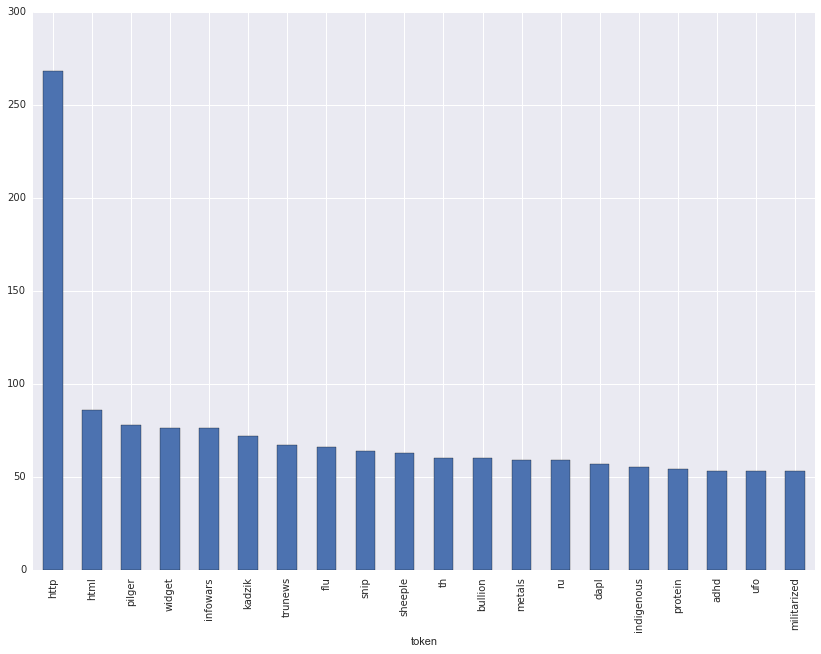

In [119]:
top_20_fake.plot(kind="bar", figsize=(14, 10))

Plot reals

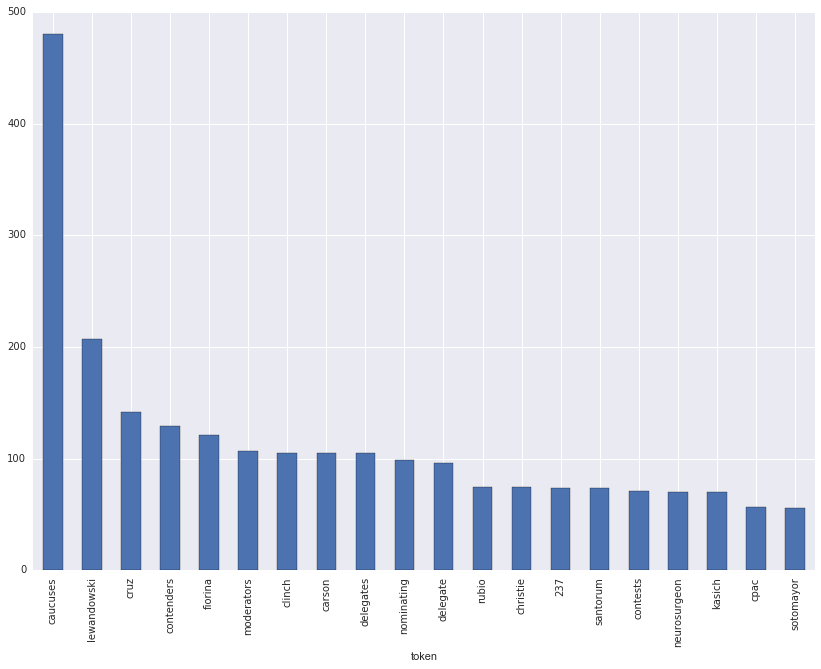

In [120]:
top_20_real.plot(kind="bar", figsize=(14, 10))